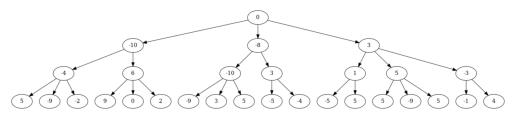

The optimal value determined by Minimax is: 5


In [13]:
import random
from graphviz import Digraph
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class Node:
    def __init__(self, val):
        self.val = val  # Value of the node (used for minimax at leaves)
        self.children = []

    def add_child(self, child_node):
        self.children.append(child_node)

class Tree:
    def __init__(self, depth, root):
        self.depth = depth
        self.root = root

    def generate_children(self, node):
        """Generate a random number of children for a given node."""
        nc = random.randint(2, 3) 
        for _ in range(nc):
            child = Node(random.randint(-10, 10))  
            node.add_child(child)

    def generate_tree(self, node=None, current_depth=0):
        """Recursively generate the tree up to the specified depth."""
        if current_depth >= self.depth:
            return  # Stop if the max depth is reached
            
        self.generate_children(node)

        for child in node.children:
            self.generate_tree(child, current_depth + 1)

    def visualize_tree(self):
        """Visualize the tree using Graphviz."""
        dot = Digraph(comment="Tree Visualization")

        def add_nodes_edges(node):
            # Add the node to the graph
            dot.node(str(id(node)), f'{node.val}')

            # Add edges to the graph
            for child in node.children:
                dot.edge(str(id(node)), str(id(child)))
                add_nodes_edges(child)

        add_nodes_edges(self.root)
        return dot

    def minimax(self, node, depth, maximizing_player):
        if depth == 0 or not node.children:
            return node.val

        if maximizing_player:
            max_eval = float('-inf')
            for child in node.children:
                eval = self.minimax(child, depth - 1, False)  
                max_eval = max(max_eval, eval)
            return max_eval
        else:
            min_eval = float('inf')
            for child in node.children:
                eval = self.minimax(child, depth - 1, True) 
                min_eval = min(min_eval, eval)
            return min_eval


root = Node(0) 
tree = Tree(3, root)  
tree.generate_tree(root)  


dot = tree.visualize_tree() 
dot.render('tree', format='png', view=False)
img = mpimg.imread('tree.png')  
plt.imshow(img)
plt.axis('off')  
plt.show()

# Apply Minimax algorithm
optimal_value = tree.minimax(root, 3, True)  # Start with maximizing player
print(f"The optimal value determined by Minimax is: {optimal_value}")
